In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
cd ..

/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, optimizers, regularizers
import matplotlib.pyplot as plt

In [ ]:
test_images  = []
test_labels  = []

In [ ]:
#TEST DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = 'content/drive/MyDrive/Lumiere Project/Data/test/adenocarcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(0)

In [ ]:
file = 'content/drive/MyDrive/Lumiere Project/Data/test/large.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(1)

In [ ]:
#CATEGORY: NORMAL - 2
file = 'content/drive/MyDrive/Lumiere Project/Data/test/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(2)

In [ ]:
#CATEGORY: SQUAMOUS - 3
file = 'content/drive/MyDrive/Lumiere Project/Data/test/squamous.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(3)

In [ ]:
train_images = []
train_labels = []

In [ ]:
#TRAIN DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = 'content/drive/MyDrive/Lumiere Project/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(0)

In [ ]:
#CATEGORY: LARGE CELL CARCINOMA - 1
file = 'content/drive/MyDrive/Lumiere Project/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(1)

In [ ]:
#CATEGORY: NORMAL - 2
file = 'content/drive/MyDrive/Lumiere Project/Data/train/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(2)

In [ ]:
#CATEGORY: SQUAMOUS - 3
file = 'content/drive/MyDrive/Lumiere Project/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(3)

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images = train_images.reshape(601, 320, 320,1)
test_images = test_images.reshape(315, 320, 320,1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320,320,1))) #1 canal = Grayscale?
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(48, (3, 3), activation='relu')) #1 canal = Grayscale?
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 389376)            0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_images, train_labels, epochs=50, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/50
19/19 [==============================] - 15s 162ms/step - loss: 3.8789 - accuracy: 0.2812 - val_loss: 1.2395 - val_accuracy: 0.3937
Epoch 2/50
19/19 [==============================] - 2s 85ms/step - loss: 1.2367 - accuracy: 0.4509 - val_loss: 1.0656 - val_accuracy: 0.5524
Epoch 3/50
19/19 [==============================] - 2s 84ms/step - loss: 1.1861 - accuracy: 0.4459 - val_loss: 1.0728 - val_accuracy: 0.5524
Epoch 4/50
19/19 [==============================] - 2s 89ms/step - loss: 1.0977 - accuracy: 0.4742 - val_loss: 1.0426 - val_accuracy: 0.5333
Epoch 5/50
19/19 [==============================] - 2s 89ms/step - loss: 1.0996 - accuracy: 0.4992 - val_loss: 1.0487 - val_accuracy: 0.5460
Epoch 6/50
19/19 [==============================] - 2s 88ms/step - loss: 1.0655 - accuracy: 0.5042 - val_loss: 1.0151 - val_accuracy: 0.5492
Epoch 7/50
19/19 [==============================] - 2s 86ms/step - loss: 1.0173 - accuracy: 0.5175 - val_loss: 1.0247 - val_accuracy: 0.5492
Epoch 8/50


10/10 - 0s - loss: 1.1789 - accuracy: 0.4952 - 249ms/epoch - 25ms/step


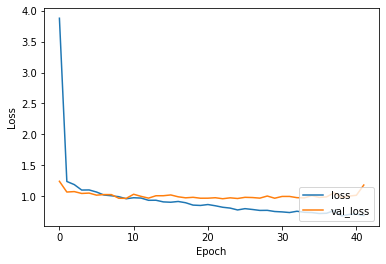

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.4952380955219269


In [ ]:
from sklearn import metrics

metrics.roc_auc_score(
    test_labels, model.predict(test_images), multi_class="ovr", average="weighted"
  )

10/10 [==============================] - 0s 23ms/step


0.6918965736264585

In [ ]:
print(metrics.classification_report(test_labels, model.predict(test_images).argmax(axis=-1)))

10/10 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       0.47      0.70      0.56       120
           1       0.00      0.00      0.00        51
           2       1.00      0.94      0.97        54
           3       0.25      0.23      0.24        90

    accuracy                           0.50       315
   macro avg       0.43      0.47      0.44       315
weighted avg       0.42      0.50      0.45       315



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels, model.predict(test_images).argmax(axis=-1))

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

10/10 [==============================] - 0s 24ms/step


<ipython-input-27-53cac74c51b2>:16: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-27-53cac74c51b2>:24: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [ ]:
ACC, TPR, TNR

(array([0.58095238, 0.83809524, 0.99047619, 0.58095238]),
 array([0.7       , 0.        , 0.94444444, 0.23333333]),
 array([0.50769231, 1.        , 1.        , 0.72      ]))

In [ ]:
np.mean(ACC), np.mean(TPR), np.mean(TNR)

(0.7476190476190477, 0.46944444444444444, 0.8069230769230769)

In [ ]:
# Autoencoder
import keras
input_img = keras.Input(shape=(320,320,1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 320, 320, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 160, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 8)       1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 8)         584   

In [ ]:
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/50
76/76 [==============================] - 6s 37ms/step - loss: 0.5569 - val_loss: 0.4193
Epoch 2/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4875 - val_loss: 0.4094
Epoch 3/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4694 - val_loss: 0.3945
Epoch 4/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4614 - val_loss: 0.3902
Epoch 5/50
76/76 [==============================] - 2s 25ms/step - loss: 0.4583 - val_loss: 0.3890
Epoch 6/50
76/76 [==============================] - 2s 26ms/step - loss: 0.4572 - val_loss: 0.3874
Epoch 7/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4563 - val_loss: 0.3868
Epoch 8/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4551 - val_loss: 0.3863
Epoch 9/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4545 - val_loss: 0.3861
Epoch 10/50
76/76 [==============================] - 2s 24ms/step - loss: 0.4545 - val_loss: 0.3881
Epoch 11/

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
def encoder(input_img):
    #encoder

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    return encoded

def fc(enco):
    flat = layers.Flatten()(enco)
    den = layers.Dense(64, activation='relu')(flat)
    out = layers.Dense(4, activation='softmax')(den)
    return out

encode = encoder(input_img)
full_model = keras.Model(input_img,fc(encode))

In [ ]:
for l1,l2 in zip(full_model.layers[:3],autoencoder.layers[0:3]):
    l1.set_weights(l2.get_weights())

In [ ]:
for layer in full_model.layers[0:3]:
    layer.trainable = False

In [ ]:
full_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = full_model.fit(train_images, train_labels, epochs=50, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/50
19/19 [==============================] - 3s 64ms/step - loss: 1.2387 - accuracy: 0.4809 - val_loss: 0.9542 - val_accuracy: 0.4635
Epoch 2/50
19/19 [==============================] - 0s 26ms/step - loss: 0.8754 - accuracy: 0.5790 - val_loss: 0.9253 - val_accuracy: 0.4952
Epoch 3/50
19/19 [==============================] - 0s 25ms/step - loss: 0.7218 - accuracy: 0.6639 - val_loss: 0.9156 - val_accuracy: 0.4889
Epoch 4/50
19/19 [==============================] - 0s 26ms/step - loss: 0.5485 - accuracy: 0.7920 - val_loss: 1.0691 - val_accuracy: 0.4762
Epoch 5/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4244 - accuracy: 0.8253 - val_loss: 1.0021 - val_accuracy: 0.4540
Epoch 6/50
19/19 [==============================] - 0s 26ms/step - loss: 0.2840 - accuracy: 0.9285 - val_loss: 1.2120 - val_accuracy: 0.4921
Epoch 7/50
19/19 [==============================] - 0s 26ms/step - loss: 0.1857 - accuracy: 0.9534 - val_loss: 1.0672 - val_accuracy: 0.5429
Epoch 8/50
19

10/10 - 0s - loss: 1.1789 - accuracy: 0.4952 - 265ms/epoch - 27ms/step


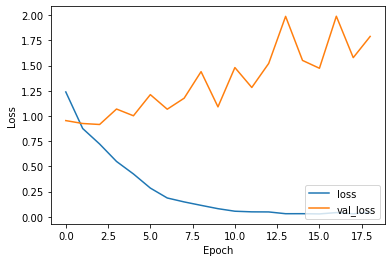

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
metrics.roc_auc_score(
    test_labels, full_model.predict(test_images), multi_class="ovr", average="weighted"
  )

10/10 [==============================] - 0s 11ms/step


0.7412197602312545

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels, full_model.predict(test_images).argmax(axis=-1))

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

np.mean(ACC), np.mean(TPR), np.mean(TNR)

10/10 [==============================] - 0s 13ms/step


(0.7555555555555556, 0.5225354030501089, 0.8232342657342657)

10/10 [==============================] - 0s 22ms/step


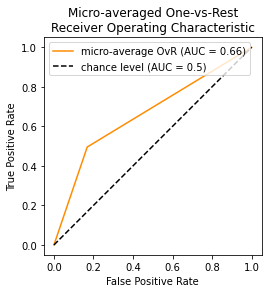

In [ ]:
# CNN plots
from sklearn.preprocessing import label_binarize
y_test = label_binarize(test_labels, classes=[0,1,2,3])
y_pred = label_binarize(model.predict(test_images).argmax(axis=-1), classes=[0,1,2,3])

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_pred.ravel(),
    y_test.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

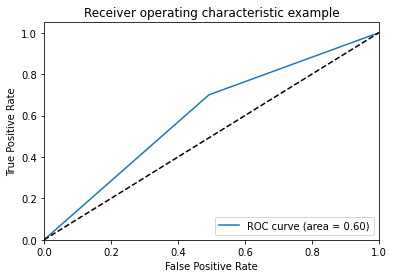

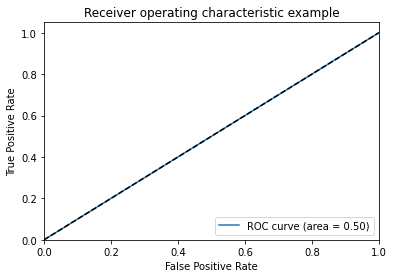

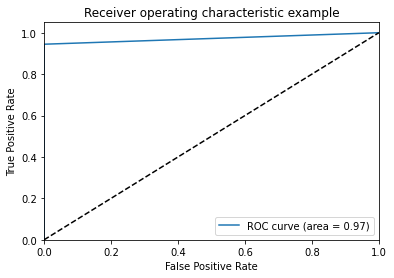

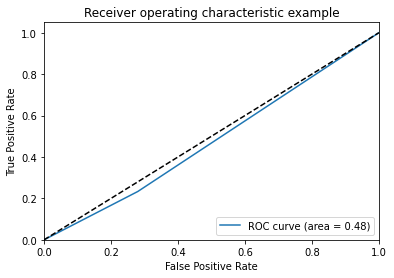

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(test_labels, classes=[0,1,2,3])
y_pred = label_binarize(full_model.predict(test_images).argmax(axis=-1), classes=[0,1,2,3])

10/10 [==============================] - 0s 17ms/step


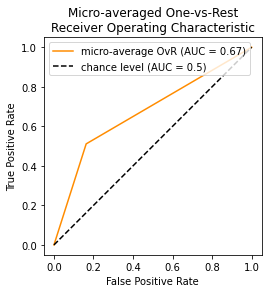

In [ ]:
# Autoencoder plots
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_pred.ravel(),
    y_test.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

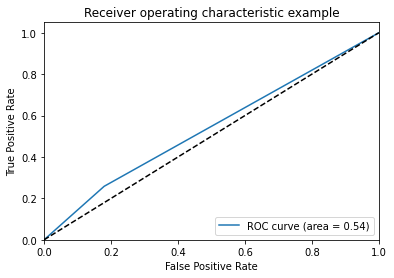

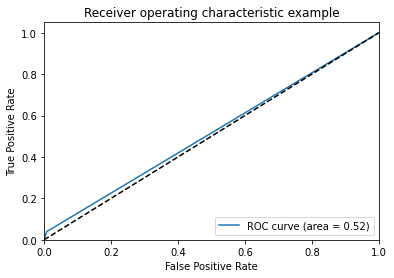

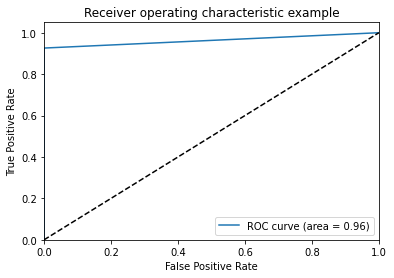

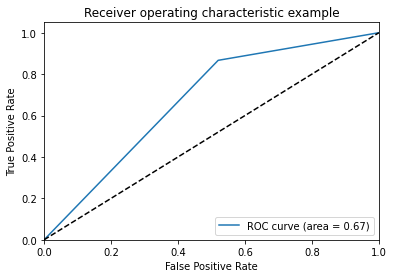

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# CNN with Regularisation

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320,320,1))) #1 canal = Grayscale?
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1L2(),
    bias_regularizer=regularizers.L2(),
    activity_regularizer=regularizers.L2()))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(),
    bias_regularizer=regularizers.L2(),
    activity_regularizer=regularizers.L2()))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_images, train_labels, epochs=50, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/50
19/19 [==============================] - 4s 115ms/step - loss: 4.5151 - accuracy: 0.2762 - val_loss: 1.3838 - val_accuracy: 0.3810
Epoch 2/50
19/19 [==============================] - 2s 89ms/step - loss: 1.3838 - accuracy: 0.3261 - val_loss: 1.3806 - val_accuracy: 0.3810
Epoch 3/50
19/19 [==============================] - 2s 86ms/step - loss: 1.3857 - accuracy: 0.3511 - val_loss: 1.3773 - val_accuracy: 0.3810
Epoch 4/50
19/19 [==============================] - 2s 85ms/step - loss: 1.3794 - accuracy: 0.3311 - val_loss: 1.3736 - val_accuracy: 0.3810
Epoch 5/50
19/19 [==============================] - 2s 91ms/step - loss: 1.3775 - accuracy: 0.3444 - val_loss: 1.3547 - val_accuracy: 0.5143
Epoch 6/50
19/19 [==============================] - 2s 93ms/step - loss: 1.3486 - accuracy: 0.3943 - val_loss: 1.2973 - val_accuracy: 0.2794
Epoch 7/50
19/19 [==============================] - 2s 87ms/step - loss: 1.3183 - accuracy: 0.4160 - val_loss: 1.2531 - val_accuracy: 0.5524
Epoch 8/50
1

10/10 - 0s - loss: 1.0908 - accuracy: 0.5365 - 263ms/epoch - 26ms/step


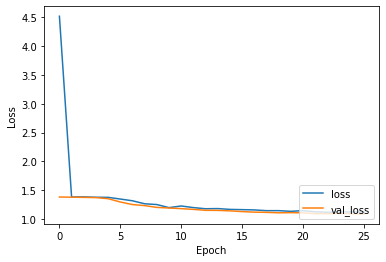

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
from sklearn import metrics

metrics.roc_auc_score(
    test_labels, model.predict(test_images), multi_class="ovr", average="weighted"
  )

10/10 [==============================] - 0s 21ms/step


0.6835399249537182

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels, model.predict(test_images).argmax(axis=-1))

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

10/10 [==============================] - 0s 22ms/step


<ipython-input-53-53cac74c51b2>:16: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-53-53cac74c51b2>:24: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [ ]:
np.mean(ACC), np.mean(TPR), np.mean(TNR)

(0.7682539682539683, 0.47685185185185186, 0.8128205128205128)

# InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from torchvision import transforms

In [ ]:
greyscale_tfm = transforms.Grayscale(num_output_channels=3)
PIL = transforms.ToPILImage()

In [ ]:
train_images = []
train_labels = []

test_images  = []
test_labels  = []

In [ ]:
#TEST DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = 'content/drive/MyDrive/Lumiere Project/Data/test/adenocarcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(0)

file = 'content/drive/MyDrive/Lumiere Project/Data/test/large.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(1)

#CATEGORY: NORMAL - 2
file = 'content/drive/MyDrive/Lumiere Project/Data/test/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(2)

#CATEGORY: SQUAMOUS - 3
file = 'content/drive/MyDrive/Lumiere Project/Data/test/squamous.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(3)

#TRAIN DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = 'content/drive/MyDrive/Lumiere Project/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(0)

#CATEGORY: LARGE CELL CARCINOMA - 1
file = 'content/drive/MyDrive/Lumiere Project/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(1)

#CATEGORY: NORMAL - 2
file = 'content/drive/MyDrive/Lumiere Project/Data/train/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(2)

#CATEGORY: SQUAMOUS - 3
file = 'content/drive/MyDrive/Lumiere Project/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)
  img_resized = PIL(img_resized)
  img_resized = greyscale_tfm(img_resized)
  img_resized = np.array(img_resized)
  img_resized = img_resized / 255
  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(3)

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
train_images = train_images.reshape(601, 320, 320,3)
test_images = test_images.reshape(315, 320, 320,3)

In [ ]:
# Import InceptionV3 Model
# https://github.com/kohpangwei/influence-release
inc_model = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(320, 320, 3))

print("number of layers:", len(inc_model.layers))

87910968/87910968 [==============================] - 5s 0us/step
number of layers: 311


In [ ]:
#Adding custom Layers
x = inc_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1L2(),
    bias_regularizer=regularizers.L2(),
    activity_regularizer=regularizers.L2())(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(),
    bias_regularizer=regularizers.L2(),
    activity_regularizer=regularizers.L2())(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(4, activation = 'softmax')(x)

In [ ]:
# Custom layers are fed into the main model
model_ = models.Model(inputs=inc_model.input, outputs=predictions)

# Stops the main frozen body of the architecture to be updated through backprop
for layer in model_.layers[:52]:
    layer.trainable = False

# compile the model
model_.compile(optimizer='adam'
                    , loss=tf.keras.losses.SparseCategoricalCrossentropy()
                    , metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.best.inc.smiling.hdf5', 
                               verbose=1, save_best_only=True)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model_.fit(train_images, train_labels, epochs=50, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[callback, checkpointer])

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 1.4095 - accuracy: 0.3295
Epoch 1: val_loss improved from inf to 402.73914, saving model to weights.best.inc.smiling.hdf5
19/19 [==============================] - 54s 913ms/step - loss: 1.4095 - accuracy: 0.3295 - val_loss: 402.7391 - val_accuracy: 0.1714
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.2926 - accuracy: 0.4326
Epoch 2: val_loss did not improve from 402.73914
19/19 [==============================] - 9s 494ms/step - loss: 1.2926 - accuracy: 0.4326 - val_loss: 1820169.7500 - val_accuracy: 0.1714
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.2620 - accuracy: 0.4775
Epoch 3: val_loss improved from 402.73914 to 196.75162, saving model to weights.best.inc.smiling.hdf5
19/19 [==============================] - 11s 579ms/step - loss: 1.2620 - accuracy: 0.4775 - val_loss: 196.7516 - val_accuracy: 0.1714
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss

In [ ]:
#load the best model
model_.load_weights('weights.best.inc.smiling.hdf5')

10/10 - 1s - loss: 1.8272 - accuracy: 0.5841 - 1s/epoch - 135ms/step


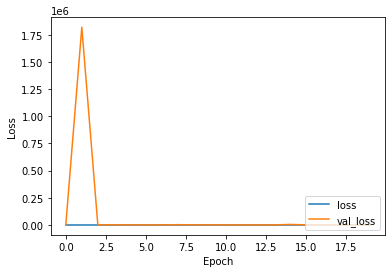

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model_.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
from sklearn import metrics

metrics.roc_auc_score(
    test_labels, model_.predict(test_images), multi_class="ovr", average="weighted"
  )

10/10 [==============================] - 3s 139ms/step


0.8653672785281981

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels, model_.predict(test_images).argmax(axis=-1))

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

10/10 [==============================] - 1s 140ms/step


<ipython-input-69-8c3344a75d06>:16: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-69-8c3344a75d06>:24: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [ ]:
np.mean(ACC), np.mean(TPR), np.mean(TNR)

(0.7920634920634921, 0.6403050108932462, 0.8548368298368298)